## Análisis de los alojamientos Airbnb en la ciudad de Roma

En este proyecto se explorará un conjunto de datos de las viviendas anunciadas en la plataforma Airbnb en esta ciudad de Italia. De esta manera, se analizará el impacto de Airbnb en el mercado de viviendas en una ciudad tan turística como Roma, y los patrones de alquiler, precios y flujos turísticos de la ciudad.

Este análisis permitirá comprender el impacto de esta plataforma y formular posibles regulaciones para abordar los problemas asociados.

### Inside Airbnb: Rome, Lazio, Italy -> https://insideairbnb.com/get-the-data/

#### Files:

- ``listings.csv.gz`` - Detailed Listings data
- ``calendar.csv.gz`` - Detailed Calendar Data
- ``reviews.csv.gz`` - Detailed Review Data
- ``listings.csv`` - Summary information and metrics for listings in Rome (good for visualisations).
- ``reviews.csv`` - Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).
- ``neighbourhoods.csv`` - Neighbourhood list for geo filter. Sourced from city or open source GIS files.
- ``neighbourhoods.geojson`` - GeoJSON file of neighbourhoods of the city.

## ÍNDICE

### 1. Importar librerías y otro código útil

### 2. Lectura y visualización de los diferentes dataset

### 3. Información del dataset principal de anuncios
  - Información general
  - Creación de una copia de los dataset para trabajar con ellos
  - Creación del dataset de trabajo con las columnas de interés

### 4. Preprocesamiento
  - Tratamiento de columnas
  - Tratamiento de valores nulos
  - Tratamiento de outliers

### 5. Análisis exploratorio (EDA)
  - Análisis de los ``barrios`` (variable ``neighbourhood_cleansed``):
    - Nº de alojamientos VS barrios
    - Precio VS barrio
    - Puntuación general VS barrio
    - Creación de mapas interactivos para la visualización de la **localización** | **precio medio** | **puntuación media** de los alojamientos
  - Análisis del tipo de ``alojamientos`` más y menos habitual en los anuncios (Variables ``property_type`` y ``room_type``)
  - Nº de personas que se alojan en los apartamentos  
  - Puntuación general VS precio
  - Puntuación VS disponibilidad en el próximo mes
  - Estudio del ``host`` (variable ``host_id``)_
    - Top 10 mejores host (los que más anuncios tienen)
    - De esos, ¿cuántos son superhost? ¿Y en total cuál es la proporción de host/superhost?
  - Generación de nuevas tablas para power BI
  - Análisis de correlación
  - Nube de palabras   

---
## 1. Importar librerías y otro código útil

In [1]:
import numpy as np
import pandas as pd
import re
import warnings
from pandas.errors import SettingWithCopyWarning
# Gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Mapas interactivos
import folium
from folium import plugins
from folium.plugins import FastMarkerCluster
import geopandas as gpd
# Nube de palabras
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from PIL import Image 

In [97]:
# Cambiar las opciones de pandas para que nos muestre todas las columnas
pd.set_option('display.max_columns', None)

In [80]:
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

## 2. Lectura y visualización de los diferentes dataset

In [4]:
data = pd.read_csv('https://data.insideairbnb.com/italy/lazio/rome/2023-12-15/data/listings.csv.gz') 
# data = pd.read_csv(r'.\Data\listings.csv\listings.csv') 

In [2]:
cal = pd.read_csv('https://data.insideairbnb.com/italy/lazio/rome/2023-12-15/data/calendar.csv.gz',low_memory = False)
# cal = pd.read_csv(r'.\Data\calendar.csv\calendar.csv', low_memory = False) 
com = pd.read_csv('https://data.insideairbnb.com/italy/lazio/rome/2023-12-15/data/reviews.csv.gz')
# com = pd.read_csv(r'.\Data\reviews.csv\reviews.csv')
barrio = pd.read_csv('https://data.insideairbnb.com/italy/lazio/rome/2023-12-15/visualisations/neighbourhoods.csv')
# barrio = pd.read_csv(r'.\Data\neighbourhoods.csv')

In [4]:
print('Dimensiones listings:',data.shape)
print('Dimensiones calendar:',cal.shape)
print('Dimensiones reseñas:',com.shape)
print('Dimensiones barrio:',barrio.shape)

Dimensiones listings: (29357, 75)
Dimensiones calendar: (10717524, 7)
Dimensiones reseñas: (1621362, 6)
Dimensiones barrio: (15, 2)


In [98]:
data.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20231215032808,2023-12-15,city scrape,Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...,NaN,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,https://www.airbnb.com/users/show/3047,Elif,2008-09-18,"Rome, Italy",I am a Turkish-Italian who was born in Istanbu...,within a few hours,90%,3%,f,https://a0.muscache.com/im/pictures/user/a22d7...,https://a0.muscache.com/im/pictures/user/a22d7...,Testaccio,7.00,7.00,"['email', 'phone']",t,t,"Rome, Lazio, Italy",VIII Appia Antica,NaN,41.87,12.48,Private room,Private room,1,NaN,1.5 baths,NaN,1.00,[],$50.00,7,1125,7,7,1125,1125,7.00,1125.00,NaN,t,30,60,86,345,2023-12-15,5,0,0,2014-12-26,2015-05-08,4.80,4.60,4.60,4.80,5.00,4.40,4.40,NaN,f,6,0,6,0,0.05


In [7]:
cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,230295,2023-12-15,f,$75.00,NaN,2.0,1125.0
1,230295,2023-12-16,t,$75.00,NaN,2.0,1125.0
2,230295,2023-12-17,t,$75.00,NaN,2.0,1125.0
3,230295,2023-12-18,t,$75.00,NaN,2.0,1125.0
4,230295,2023-12-19,t,$75.00,NaN,2.0,1125.0


In [ ]:
com.head(1)

In [99]:
barrio.head(1)

,neighbourhood_group,neighbourhood
0,NaN,I Centro Storico


## 3. Información del dataset principal de anuncios

- Información general

In [ ]:
data.info()

In [ ]:
sns.heatmap(data.isnull(), cbar=False) # Vemos los nulos con un gráfico heatmap

In [5]:
nulos = data.isnull().sum()
nulos[nulos>0] #Vemos solo las columnas con nulos
nulos[nulos>0] / len(data) * 100 # Lo vemos en porcentaje

description                     100.000000
neighborhood_overview            40.181217
host_name                         0.030657
host_since                        0.030657
host_location                    22.454610
host_about                       49.422625
host_response_time               14.405423
host_response_rate               14.405423
host_acceptance_rate              9.571823
host_is_superhost                 0.660830
host_thumbnail_url                0.030657
host_picture_url                  0.030657
host_neighbourhood               52.733590
host_listings_count               0.030657
host_total_listings_count         0.030657
host_has_profile_pic              0.030657
host_identity_verified            0.030657
neighbourhood                    40.181217
neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
bathrooms_text                    0.129441
bedrooms                         99.921654
beds                              1.195626
price      

In [6]:
# Vamos a ver si hay valores duplicados
data.duplicated().sum()

0

- Creación de una copia de los dataset para trabajar con ellos

In [5]:
# Voy a hacer una copia de los dataframe original, por si necesito esas columnas más adelante
df1 = data.copy()
df2 = cal.copy()
df3 = com.copy()
df4 = barrio.copy()

- Creación del dataset de trabajo con las columnas de interés

In [9]:
# En principio voy a utilizar solo algunas columnas, por lo tanto voy a crear un nuevo df a partir de la copia del df1, que va a ser mi df de trabajo
df = df1[['longitude','latitude','host_id', 'host_since', 'host_location','host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count','host_has_profile_pic','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms_text','price', 'availability_30', 'availability_60', 'availability_90','number_of_reviews','review_scores_rating','review_scores_location','reviews_per_month']]

## 4. Preprocesamiento

### Tratamiento de columnas

In [22]:
# Reparamos la columna Price antes de reparar nulos
df['price'] = df['price'].fillna('').astype(str).str.replace('$', '', regex=True).str.replace(',', '') # Primero los NaN los quitamos, y eliminamos el simbolo $ y la coma. 
df['price'] = df['price'].replace('', 'nan').astype(float) # Luego se reemplazan los nulos por NaN de nuevo

# Reparamos otras columnas antes de reparar nulos:

df['host_response_rate'] = df['host_response_rate'].fillna('').astype(str).str.replace('%', '').replace('', 'nan').astype(float) # Quitar % detrás del numero
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna('').astype(str).str.replace('%', '').replace('', 'nan').astype(float) # Quitar % detrás del numero

### Tratamiento de valores nulos

In [23]:
# Visualizamos los valores nulos del nuevo df de trabajo
nulos = df.isnull().sum()
nulos[nulos>0] / len(df) * 100

host_since                 0.030657
host_location             22.454610
host_response_rate        14.405423
host_acceptance_rate       9.571823
host_is_superhost          0.660830
host_listings_count        0.030657
host_has_profile_pic       0.030657
bathrooms_text             0.129441
price                      6.730933
review_scores_rating      14.449705
review_scores_location    14.480362
reviews_per_month         14.548489
dtype: float64

In [ ]:
df.info()

In [24]:
# Antes que nada, me di cuenta que algunos nulos en lugar de NaN ponía [ ]. Voy a cambiarlos a NaN

df = df.replace('[]',np.NaN)

In [25]:
# Los nulos de las columnas numéricas los rellenamos con la media o mediana

# En este caso, al ser numeros reales rellenamos con media
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean())
df['price'] = df['price'].fillna(df['price'].mean()) 
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
df['review_scores_location'] = df['review_scores_location'].fillna(df['review_scores_location'].mean())
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())
# En este caso, al ser numeros enteros rellenamos con mediana y cambiamos a int
df['host_listings_count'] = df['host_listings_count'].fillna(df['host_listings_count'].median()).astype(int)

In [26]:
nulos = df.isnull().sum()
nulos[nulos>0] / len(df) * 100

host_since               0.030657
host_location           22.454610
host_is_superhost        0.660830
host_has_profile_pic     0.030657
bathrooms_text           0.129441
dtype: float64

In [52]:
#Guardar df limpio en csv
#df.to_csv('airbnb_preproc1.csv', index=False)

### Tratamiento de outliers

In [27]:
# Configura la visualización de los números en notación decimal
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# selecciono las variables que me interesan
var = df[['host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count','host_has_profile_pic','accommodates','price', 'availability_30', 'availability_60', 'availability_90','number_of_reviews','review_scores_rating','review_scores_location','reviews_per_month']]

# Aplicar la función describe() solo a las columnas numéricas
var.describe().T

,count,mean,std,min,25%,50%,75%,max
host_response_rate,29357.00,94.83,15.84,0.00,94.83,100.00,100.00,100.00
host_acceptance_rate,29357.00,89.04,23.02,0.00,89.04,99.00,100.00,100.00
host_listings_count,29357.00,15.67,74.34,1.00,1.00,3.00,7.00,2461.00
accommodates,29357.00,3.70,2.05,1.00,2.00,4.00,4.00,16.00
price,29357.00,172.38,687.91,8.00,79.00,110.00,172.38,80000.00
availability_30,29357.00,12.29,10.12,0.00,0.00,12.00,21.00,30.00
availability_60,29357.00,29.71,21.65,0.00,3.00,35.00,49.00,60.00
availability_90,29357.00,47.78,33.34,0.00,9.00,58.00,78.00,90.00
number_of_reviews,29357.00,55.23,89.38,0.00,3.00,18.00,68.00,1879.00
review_scores_rating,29357.00,4.72,0.35,0.00,4.67,4.76,4.92,5.00


Entre los parámetros estadísticos de las diferentes variables, destaca la desviación estándar de la variable ``price``. Vamos a visualizarla:

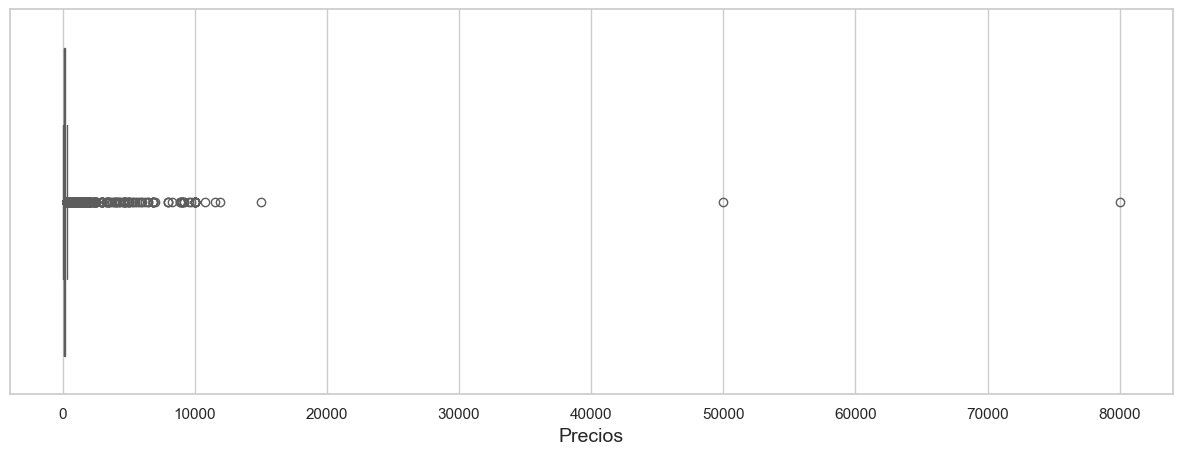

In [15]:
# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(15, 5))  # Tamaño del gráfico
sns.set(style="whitegrid")  # Estilo de la cuadrícula de Seaborn
fig = sns.boxplot(x="price", data=df, color = '#73C4A8')  # Crear el gráfico de cajas y bigotes
fig.set_xlabel('Precios', fontsize=14)
plt.show()

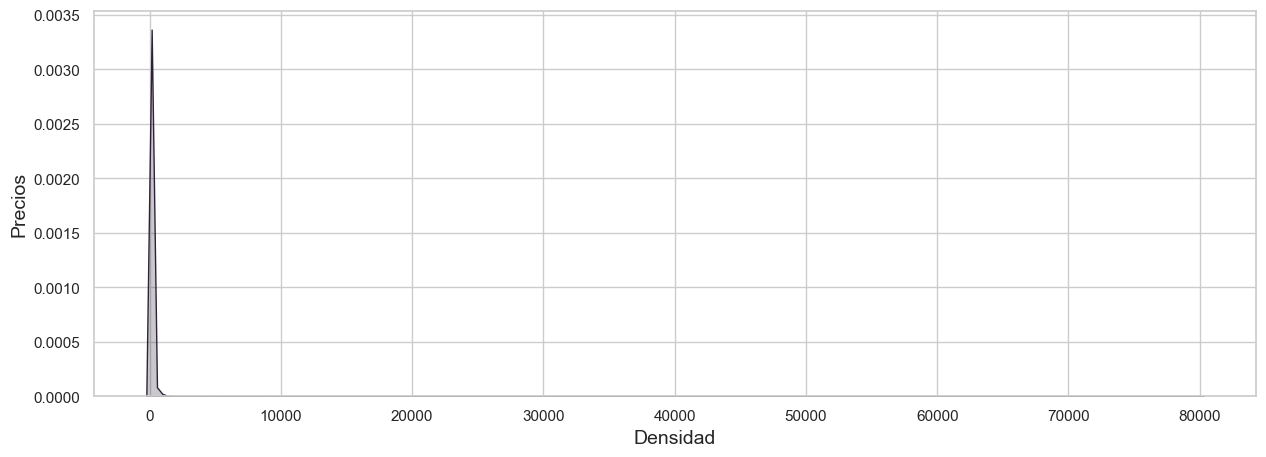

In [18]:
# grafico de densidad
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=df, x='price', fill=True, color='#2D223A')
ax.set_xlabel('Densidad', fontsize=14)
ax.set_ylabel('Precios', fontsize=14)
plt.show()

In [15]:
# VISUALIZAR VALORES ATÍPICOS USANDO RANGOS INTERCUARTÍLICOS

# Función para ver la cantidad de outliers que hay en nuestro dataset según los rangos intercuartílicos
def outliers (df):
    for columnas in df:
        if df[columnas].dtype in ['int64', 'float64']:  # Comprueba si la columna es numérica

            Q1 = df[columnas].quantile(0.25)
            Q3 = df[columnas].quantile(0.75)
            IQR = Q3 - Q1
            outlierIzq = Q1-(1.5*IQR)
            outlierDer = Q3+(1.5*IQR)
            outliers = df[columnas][(df[columnas] < outlierIzq) | (df[columnas] > outlierDer)]
            print("La variable " + columnas + " tiene " + str(len(outliers)) + " valores outliers")

    
outliers(df)

La variable longitude tiene 1827 valores outliers
La variable latitude tiene 2996 valores outliers
La variable host_id tiene 0 valores outliers
La variable host_response_rate tiene 2221 valores outliers
La variable host_acceptance_rate tiene 3553 valores outliers
La variable accommodates tiene 1462 valores outliers
La variable price tiene 1915 valores outliers
La variable availability_30 tiene 0 valores outliers
La variable availability_60 tiene 0 valores outliers
La variable availability_90 tiene 0 valores outliers
La variable number_of_reviews tiene 2818 valores outliers
La variable review_scores_rating tiene 1966 valores outliers
La variable review_scores_location tiene 1725 valores outliers
La variable reviews_per_month tiene 1300 valores outliers


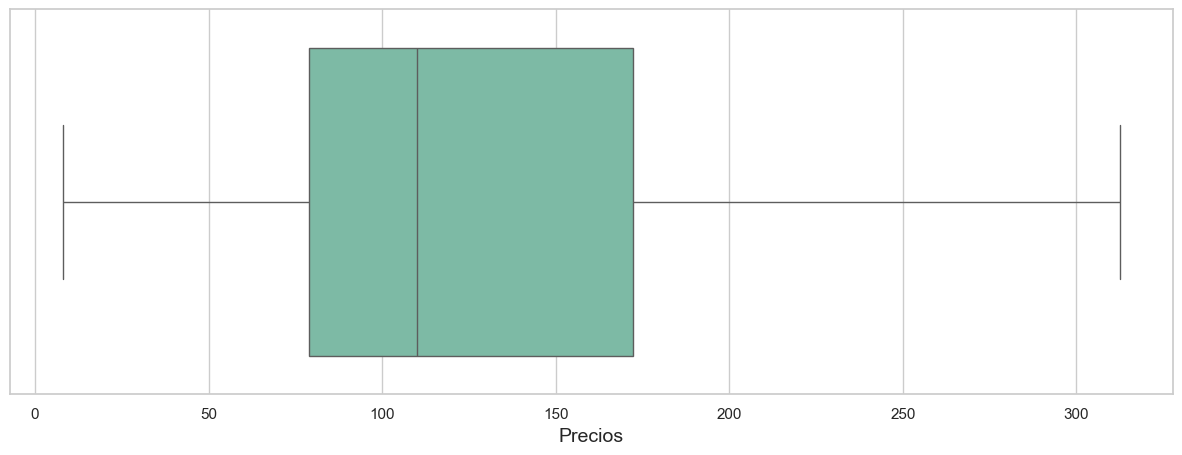

In [28]:
# REPARAR VALORES ATIPICOS USANDO RANGOS INTERCUARTÍLICOS

def reparar_atipicos(df, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    
    atipico_inf = Q1 - (1.5 * IQR)
    atipico_sup = Q3 + (1.5 * IQR)
    
    for indice in range(len(df[col.name])): # Itera sobre los índices del DataFrame para acceder a cada elemento de la columna col
        if indice in df.index:  # Verifica si el índice está en el rango válido
            elemento = df.loc[indice, col.name] # Accede al valor de la columna col en la fila correspondiente al índice actual.
            if elemento > atipico_sup: 
                df.loc[indice, col.name] = atipico_sup
            elif elemento < atipico_inf: 
                df.loc[indice, col.name] = atipico_inf
            
    return df  

#Reparamos los atípicos de la variable Precio
reparar_atipicos(df, df['price'])

# Visualizamos de nuevo con cajas y bigotes
plt.figure(figsize=(15, 5))  # Tamaño del gráfico
sns.set(style="whitegrid")  # Estilo de la cuadrícula de Seaborn
fig = sns.boxplot(x="price", data=df, color = '#73C4A8')  # Crear el gráfico de cajas y bigotes
fig.set_xlabel('Precios', fontsize=14)
plt.show()

In [62]:
#Guardar el df limpio en un csv
# df.to_csv('airbnb_limpio.csv', index=False)

## 5. Análisis exploratorio (EDA)

### Análisis de los ``barrios``

In [131]:
latitudes = df['latitude'].tolist()
longitudes = df['longitude'].tolist()
coordenadas = list(zip(latitudes,longitudes))

In [132]:
# Defino la ubicacion inicial del mapa
latitud_1 = df['latitude'].iloc[0]
longitud_1 = df['longitude'].iloc[0]
# Crear el mapa de Folium con la ubicación inicial especificada
map = folium.Map(location = [latitud_1,longitud_1],zoom_start=10)
# Añadir las ubicaciones al mapa generado de Folium
FastMarkerCluster(data=coordenadas).add_to(map) # Se usa para agrupar los marcadores mas cercanos en clusteres
folium.Marker(location=[latitud_1,longitud_1]).add_to(map)
map

- Nº de alojamientos VS barrios: Vemos que en el centro histórico el número de alojamientos o anuncios es mucho mayor en comparación con los demás barrios.

In [127]:
aloj_barrio = df['neighbourhood_cleansed'].value_counts(normalize=True).sort_values(ascending=True)

In [24]:
fig = px.bar(aloj_barrio, x=aloj_barrio.values, y=aloj_barrio.index,color=aloj_barrio.values, color_continuous_scale='BrBG', text_auto = False) #Con text_auto sale el nombre del conteo en cada barra
#actualizamos el layout
fig.update_layout(
    title='Número de alojamientos por barrios de Roma', title_x=0.5, 
    yaxis_title='Barrios de Roma',
    xaxis_title='Número de alojamientos',
    template='plotly_white',
	width=1500, height=500) 


fig.show()

- Precio VS barrio

In [29]:
barrio_precio = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)

In [42]:
fig = px.bar(barrio_precio,
             color=barrio_precio.values,
             color_continuous_scale='tempo', 
             labels={'y':'Barrios de Roma', 'x':'Precio medio por noche', 'color': 'Precio medio'},
             template='plotly_white',width=1300, height=600)

fig.update_layout(title='Precio medio por alojamiento y barrios', title_x=0.5, 
  xaxis_title='Barrios de Roma',
  yaxis_title='Precio medio por noche')
fig.show()

- Puntuación general VS barrio

In [30]:
# Puntuación general
punt_barrio_general = df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values().reset_index()
# Puntuación de la localización
punt_barrio_localiz = df.groupby('neighbourhood_cleansed')['review_scores_location'].mean().sort_values().reset_index()

In [52]:
fig = px.bar(punt_barrio_general, x='review_scores_rating', y='neighbourhood_cleansed', color='review_scores_rating', color_continuous_scale='tempo')
fig.update_layout(height=500, width=1500, title_text="Puntuación de los alojamientos por barrios (0-5 *****)", title_x=0.5,xaxis_title='Puntuación general',yaxis_title = '',
                  coloraxis_colorbar_title='Puntuación')  # Establecer el título en la barra de colores

fig.show()

In [43]:
fig = px.bar(punt_barrio_localiz, x='review_scores_location', y='neighbourhood_cleansed', color='review_scores_location', color_continuous_scale='tempo')
fig.update_layout(height=500, width=1500, title_text="Puntuación de los alojamientos por barrios (0-5 *****)", title_x=0.5,xaxis_title='Puntuación de la localización',yaxis_title = '',coloraxis_colorbar_title='Puntuación')
fig.show()

- Creación de mapas interactivos para la visualización de la localización | precio medio | puntuación media

In [123]:
#Leemos el archivo JSON que contiene la geometría para cada ubicación
geo = gpd.read_file("https://data.insideairbnb.com/italy/lazio/rome/2023-12-15/visualisations/neighbourhoods.geojson")
# geo = gpd.read_file(r".\Data\neighbourhoods.geojson") 

In [124]:
geo.head()

,neighbourhood,neighbourhood_group,geometry
0,I Centro Storico,None,"MULTIPOLYGON (((12.44396 41.93390, 12.44472 41..."
1,III Monte Sacro,None,"MULTIPOLYGON (((12.56321 42.07464, 12.56269 42..."
2,IV Tiburtina,None,"MULTIPOLYGON (((12.63542 41.95729, 12.63696 41..."
3,VI Roma delle Torri,None,"MULTIPOLYGON (((12.70671 41.93375, 12.70691 41..."
4,VII San Giovanni/Cinecittà,None,"MULTIPOLYGON (((12.51668 41.89194, 12.52266 41..."


In [125]:
geo = geo[['neighbourhood','geometry']]
geo.isnull().sum() #Vemos que las variables que nos interesan no tienen nulos

neighbourhood    0
geometry         0
dtype: int64

In [128]:
# Uso las variables creadas en los apartados anteriores
df_aloj_barrio = aloj_barrio.reset_index() # Convertimos a formato df para poder manipularlo
df_barrio_precio = barrio_precio.reset_index() # Convertimos a formato df para poder manipularlo
df_aloj_barrio.columns = ['neighbourhood','normalized count'] # Cambio de nombre a las columnas del precio VS barrio
df_barrio_precio.columns = ['neighbourhood','mean price'] # Cambio de nombre a las columnas del precio VS barrio
punt_barrio_general.columns = ['neighbourhood','general score'] # Cambio de nombre a las columnas de la puntuación VS barrio

In [129]:
#Creamos un nuevo df llamado geo1 con la información de geo y la columna del conteo de alojamientos, utilizando como común la columna de barrio
geo1 = pd.merge(geo, df_aloj_barrio[['neighbourhood', 'normalized count']], on='neighbourhood', how='left') 
#Creamos un nuevo df llamado geo2 con la información de geo1 y la columna del precio medio por barrio, utilizando como común la columna de barrio
geo2 = pd.merge(geo1, df_barrio_precio[['neighbourhood', 'mean price']], on='neighbourhood', how='left') 
#Creamos un nuevo df final con la columna de la puntuación general por barrio, utilizando como común la columna de barrio de geo2
geo_final = pd.merge(geo2, punt_barrio_general[['neighbourhood', 'general score']], on='neighbourhood', how='left')

In [75]:
# Guardar el geo_final a un csv
geo_final.to_csv('geo_final.csv', index=False)

In [32]:
geo_final.head(1)

,neighbourhood,geometry,normalized count,mean price,general score
0,I Centro Storico,"MULTIPOLYGON (((12.44396 41.93390, 12.44472 41...",0.53,148.02,4.71


In [133]:
# Crear el mapa de Folium con la ubicación inicial especificada
m = folium.Map(location = [latitud_1,longitud_1],zoom_start=10)


# 1- Mapa por colores con el conteo de anuncios por barrio
# Crear una instancia de folium.Choropleth
anuncios = folium.Choropleth(geo_final, data=geo_final, fill_color = 'magma_r',columns=['neighbourhood','normalized count'],key_on='feature.properties.neighbourhood',name='Nº anuncios')

# Agregar la instancia de folium.Choropleth al mapa m
anuncios.add_to(m)

# Definir el contenido del tooltip (lo que se muestra al poner el cursor encima)
tooltip_anuncios = folium.GeoJsonTooltip(fields=['neighbourhood', 'normalized count'], #Lista de campos que se muestran en el tooltip
                                 aliases=['Barrio', 'Nº anuncios'],
                                 labels=True,
                                 sticky=False) # Si el tooltip permanece visible aunque no esté el cursor encima

anuncios.geojson.add_child(tooltip_anuncios)

#-----------------------------------------

# 2- Mapa por colores con la media de precios por barrio
# Crear una instancia de folium.Choropleth
precios = folium.Choropleth(geo_final, data=geo_final, fill_color = 'magma_r',columns=['neighbourhood','mean price'],key_on='feature.properties.neighbourhood',name='Precio medio')

# Agregar la instancia de folium.Choropleth al mapa m
precios.add_to(m)

# Definir el contenido del tooltip (lo que se muestra al poner el cursor encima)
tooltip_precios = folium.GeoJsonTooltip(fields=['neighbourhood', 'mean price'], #Lista de campos que se muestran en el tooltip
                                 aliases=['Barrio', 'Precio medio'],
                                 labels=True,
                                 sticky=False) # Si el tooltip permanece visible aunque no esté el cursor encima

precios.geojson.add_child(tooltip_precios)

#-----------------------------------------

# 3- Mapa por colores con la media de puntuación por barrio
# Crear otra instancia de folium.Choropleth
punt = folium.Choropleth(geo_final, data=geo_final, fill_color = 'magma_r',columns=['neighbourhood','general score'],key_on='feature.properties.neighbourhood',name='Puntuación media')

# Agregar la instancia de folium.Choropleth al mapa m
punt.add_to(m)

# Definir el contenido del tooltip (lo que se muestra al poner el cursor encima)
tooltip_punt = folium.GeoJsonTooltip(fields=['neighbourhood', 'general score'], #Lista de campos que se muestran en el tooltip
                                 aliases=['Barrio', 'Puntuación media'],
                                 labels=True,
                                 sticky=False) 

punt.geojson.add_child(tooltip_punt)

# Añade un control de capas
folium.LayerControl().add_to(m) 

folium.LayerControl({'Nº anuncios':anuncios.layer_name,'Precio medio': precios.layer_name,
                     'Puntuación media': punt.layer_name}).add_to(m)
m

In [134]:
#guardar mapa html
m.save('rome_map.html')

In [56]:
# heatmap según la media de precios por barrio

color_map = folium.LinearColormap(['blue', 'green','yellow','red'], caption='price')
# Crear un mapa de Folium
m = folium.Map(location = [latitud_1,longitud_1],tiles="Cartodb dark_matter",zoom_start=10)
# Agregar un mapa de calor
hmap = plugins.HeatMap(data=df[['latitude', 'longitude', 'price']],
        radius=30, # controla el radio de cada punto en el mapa de calor. Un radio más grande hará que los puntos del mapa de calor sean más grandes y viceversa. 
        min_opacity=0.2).add_to(m)
# Agregar la escala de color a la leyenda del mapa
m.add_child(color_map)

In [23]:
#guardar mapa html
m.save('rome_hmap.html')

- Análisis del tipo de alojamiento más habitual en los anuncios

Variables ``property_type`` y ``room_type``. No tienen nulos

In [139]:
df['property_type'].value_counts()

Entire rental unit                   13393
Entire condo                          4769
Private room in rental unit           3334
Private room in bed and breakfast     1916
Private room in condo                 1081
                                     ...  
Entire hostel                            1
Private room in pension                  1
Shared room in loft                      1
Shared room in island                    1
Castle                                   1
Name: property_type, Length: 74, dtype: int64

In [140]:
aloj = df.groupby(['property_type', 'room_type']).size().reset_index(name='count') # size() calcula el tamaño de cada grupo (nº de room_type de cada grupo de property_type)
aloj = aloj[aloj['count']>200].sort_values(by=['count']) #Selecciono solo los tipos de propiedad que aparecen más de 200 veces y ordeno los valores por las apariciones

In [149]:
df['room_type'].value_counts()

Entire home/apt    20743
Private room        7873
Hotel room           596
Shared room          145
Name: room_type, dtype: int64

In [33]:
colors = {'Entire home/apt': '#F5B041', 'Private room': '#AF7AC5', 'Hotel room': '#16A085','Shared room':'#ABEBC6'}
fig = px.bar(aloj, y='property_type', x='count', color='room_type',color_discrete_map=colors)  

fig.update_layout(yaxis={'categoryorder':'total ascending'},
    title='Cantidad de alojamientos más frecuentes (> 200 anuncios)', title_x=0.5, 
    xaxis_title='Cantidad de alojamientos por tipo',
    yaxis_title='Tipo de propiedad',
    template='plotly_white',
	width=1500, height=500, legend_title='Tipo de habitación/apt')


fig.show()

In [28]:
# Ahora voy a graficar los alojamientos menos frecuentes (entre 50 y 200 veces)
aloj = df.groupby(['property_type', 'room_type']).size().reset_index(name='count') 
aloj = aloj[(aloj['count']<200) & (aloj['count']>50)].sort_values(by=['count']) #Selecciono solo los tipos de propiedad que aparecen entre 50 y 200 veces

fig = px.bar(aloj, y='property_type', x='count', color='room_type',color_discrete_map=colors)

fig.update_layout(yaxis={'categoryorder':'total ascending'},
    title='Cantidad de alojamientos por tipo y habitación', title_x=0.5, 
    xaxis_title='Cantidad de alojamientos por tipo',
    yaxis_title='Tipo de propiedad',
    template='plotly_white',
	width=1500, height=500, legend_title='Tipo de habitación/apt')

fig.show()

In [34]:
# Ahora voy a graficar los alojamientos menos frecuentes (menos de 50 veces)
aloj = df.groupby(['property_type', 'room_type']).size().reset_index(name='count') 
aloj = aloj[aloj['count']<5].sort_values(by=['count'],ascending=False) #Selecciono solo los tipos de propiedad que aparecen menos de 50 veces

fig = px.bar(aloj, y='property_type', x='count', color='room_type',color_discrete_map=colors)

fig.update_layout(yaxis={'categoryorder':'total ascending'},
    title='Cantidad de alojamientos menos frecuentes (< 50 anuncios)', title_x=0.5, 
    xaxis_title='Cantidad de alojamientos por tipo',
    yaxis_title='Tipo de propiedad',
    template='plotly_white', xaxis=dict(dtick=1), 
	width=1500, height=600, legend_title='Tipo de habitación/apt')

fig.show()

- Nº de personas que se alojan en los apartamentos: Lo más frecuente son 2 personas. El máximo es 16, que es lo permitido por Airbnb.

In [138]:
Accomm

,index,Alojamientos
14,15,20
12,13,30
13,14,49
15,16,78
11,12,79
10,11,80
8,9,210
9,10,256
6,7,605
7,8,660


In [139]:
Accomm = df['accommodates'].value_counts().sort_index().reset_index(name='Alojamientos').sort_values(by = 'Alojamientos')
Accomm = Accomm.rename(columns={'index': 'Indice'})
fig = px.bar(Accomm, y='Alojamientos', x='Indice',color_discrete_sequence=['#16A085'])

#actualizamos el layout
fig.update_layout(
    title='Número de personas que se alojan en las viviendas', title_x=0.5, 
    yaxis_title='Número de alojamientos',
    xaxis_title='Número de personas',
    template='plotly_white',
	width=1500, height=500) 
fig.update_xaxes(dtick=1) #Para que el eje x tome valores de 1 en 1

In [141]:
# Guardar la figura como un archivo HTML
fig.write_html("fig1.html")

- Puntuación general VS Precio

In [163]:
# Graficamos la relación entre 2 variables continuas -> Actúa de objetivo la variable score

punt_precio = df.groupby('review_scores_rating')['price'].mean().sort_values().reset_index()

In [164]:
precio_medio = df['price'].mean().round(2)

In [172]:
# Crear un scatter plot
fig = px.scatter(punt_precio, y='price', x='review_scores_rating',opacity=0.7, labels={'price': 'Precio', 'review_scores_rating': 'Puntuación general (0-5)'})
fig.update_layout(height=500, width=1500, title_text="Relación entre el precio y la puntuación general de los alojamientos", title_x=0.5,xaxis_title="Puntuación general (0-5)", yaxis_title="Precio",
                  )  
# Actualizar el tamaño de los marcadores
fig.update_traces(marker=dict(size=7)) 
# Agregar la línea horizontal para la media del precio
fig.add_hline(y=precio_medio, line_dash="dot", line_color="red", annotation_text=f"Precio medio: {precio_medio}",
              annotation_position="top left")
# Mostrar el gráfico
fig.show()

- Puntuación VS disponibilidad en el próximo mes

In [173]:
punt_dispo = df.groupby('review_scores_rating')['availability_30'].mean().sort_values().reset_index() # calcula el promedio de la disponibilidad para cada nivel de puntuación de los alojamientos. 
punt_media = df['review_scores_rating'].mean().round(2)
# Crear un scatter plot
fig = px.scatter(punt_dispo, x='availability_30', y='review_scores_rating',opacity=0.7, labels={'availability_30': 'Disponibilidad próximos 30 d', 'review_scores_rating': 'Puntuación general (0-5)'})
fig.update_layout(height=500, width=1500, title_text="Relación entre el precio y la puntuación general de los alojamientos", title_x=0.5,yaxis_title="Puntuación general (0-5)", xaxis_title="Disponibilidad próximo mes")
# Actualizar el tamaño de los marcadores
fig.update_traces(marker=dict(size=7)) 
# Agregar la línea horizontal para la media de la puntuacion
fig.add_hline(y=punt_media, line_dash="dot", line_color="red", annotation_text=f"Puntuación media: {punt_media}",
              annotation_position="top left") 
# Mostrar el gráfico
fig.show()

- Estudio de la variable ``host``:

    - Top 10 host (los que más anuncios tienen)

In [35]:
top10_host=df['host_id'].value_counts().head(10)
top10_host

23532561    265
96122546    183
1107433      70
63191555     66
8973851      57
2405376      54
4417813      51
20428282     49
316068       49
51503378     49
Name: host_id, dtype: int64

In [36]:
# Filtrar el DataFrame original para incluir solo las filas de los 10 principales anfitriones
df_top10_host = df[df['host_id'].isin(top10_host.index)]
df_top10_host['host_listings_count'].sort_values()


13851     50
11443     50
11454     50
11455     50
4334      50
        ... 
24482    484
18182    484
7983     484
10337    484
16140    484
Name: host_listings_count, Length: 893, dtype: int32

De esos, ¿cuántos son superhost? ¿Y en total cuál es la proporción de host/superhost?

In [37]:
df['host_is_superhost'].value_counts()

f    19674
t     9489
Name: host_is_superhost, dtype: int64

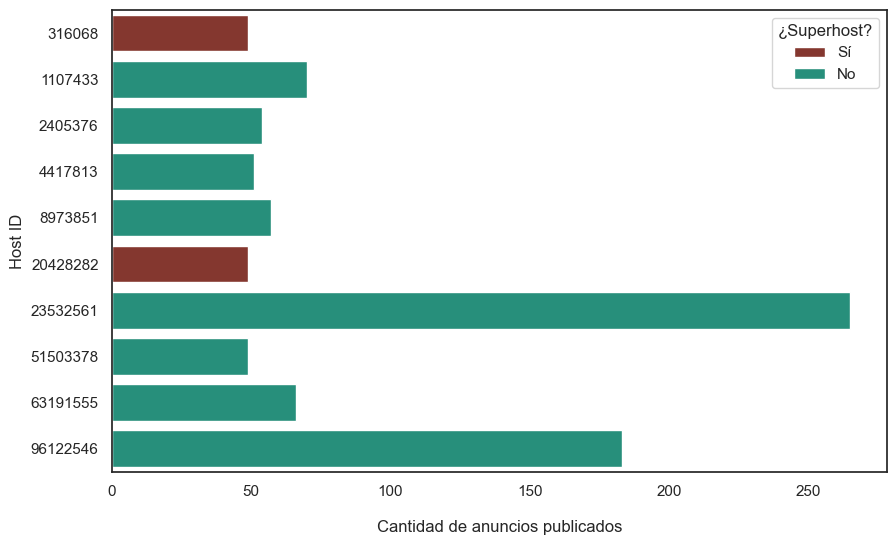

In [38]:
plt.figure(figsize=(10, 6))
sns.set_style("white") #Fondo blanco
colors = {"f": '#16A085', "t": '#922B21'}

ax = sns.countplot(data=df_top10_host, y='host_id',hue='host_is_superhost',palette=colors)


ax.set_xlabel('Cantidad de anuncios publicados', labelpad = 15) # Establecer el título del eje y y separarlo del eje
ax.set_ylabel('Host ID') 

plt.legend(title='¿Superhost?', labels=['Sí', 'No']);

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29357 entries, 0 to 29356
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               29357 non-null  float64
 1   latitude                29357 non-null  float64
 2   host_id                 29357 non-null  int64  
 3   host_since              29348 non-null  object 
 4   host_location           22765 non-null  object 
 5   host_response_rate      29357 non-null  float64
 6   host_acceptance_rate    29357 non-null  float64
 7   host_is_superhost       29163 non-null  object 
 8   host_listings_count     29357 non-null  int32  
 9   host_has_profile_pic    29348 non-null  object 
 10  neighbourhood_cleansed  29357 non-null  object 
 11  property_type           29357 non-null  object 
 12  room_type               29357 non-null  object 
 13  accommodates            29357 non-null  int64  
 14  bathrooms_text          29319 non-null

In [39]:
#Proporcion host/superhost

df['host_is_superhost']

0        f
1        f
2        t
3        f
4        t
        ..
29352    f
29353    f
29354    f
29355    f
29356    f
Name: host_is_superhost, Length: 29357, dtype: object

In [40]:
# Crear el gráfico de pastel
colors = ['#16A085', '#922B21']
fig = px.pie(values=df['host_is_superhost'].value_counts(), names=['No superhost','SUPERHOST'], color_discrete_sequence=colors, hole=0.3)
fig.update_layout(width=600, height=500, showlegend=True,  title_x=0.5, template = 'plotly_white',legend=dict(
        orientation='h',  # Orientación horizontal
        y=-0.05,  # Desplazamiento vertical desde el gráfico (0-1)
        xanchor='center',  # Ancla en el centro horizontal
        x=0.5  # Desplazamiento horizontal desde el gráfico (0-1)
    ))
fig.update_traces(textinfo='percent',textfont_size=16)
fig.update_traces(marker = dict(line = dict(color = 'black', width = 0.5)))

fig.show()

- Generación de nuevas tablas para power BI:

    - Utilizamos el dataset calendar:

In [65]:
#Eliminamos nulos
df2.dropna()
# Pasamos la columna date a formato datetime
df2['date'] = pd.to_datetime(df2['date'])
#creamos nueva columna que agrupe por año y mes
df2['año_mes'] = df2['date'].dt.to_period('M')
# Guardamos en csv para utilizar la tablña en powerbi
# df2.to_csv('calendar_mod.csv', index=False)

In [66]:
df2['listing_id'].astype(str)

0           230295
1           230295
2           230295
3           230295
4           230295
             ...  
10717519    322226
10717520    322226
10717521    322226
10717522    322226
10717523    322226
Name: listing_id, Length: 10717524, dtype: object

In [ ]:
# Reparamos la columna Price 
df2['price'] = df2['price'].fillna('').astype(str).str.replace('$', '', regex=True).str.replace(',', '') # Primero los NaN los quitamos, y eliminamos el simbolo $ y la coma. 
df2['price'] = df2['price'].replace('', 'nan').astype(float) # Luego se reemplazan los nulos por NaN de nuevo

In [114]:
# Filtra el DataFrame para mantener solo las filas donde 'available' es True
df_true = df2[df2['available'] == 't']
# Agrupa por mes y cuenta el número de 'listing_id' únicos en cada grupo
disponibles_por_mes = df_true.groupby('año_mes')['listing_id'].nunique().reset_index()
# Guardamos en csv para utilizar la tablña en powerbi
disponibles_por_mes.to_csv('dispo-mes.csv', index=False)

In [92]:
# Agrupa por mes y cuenta el número de 'price' únicos en cada grupo
precio_por_mes = df2.groupby('año_mes')['price'].mean().reset_index()
# Guardamos en csv para utilizar la tablña en powerbi
# precio_por_mes.to_csv('precio-mes.csv', index=False)

### Análisis de correlación

Como no sabemos la distribución de las variables, vamos a utilizar la correlación de Spearman:

In [209]:
#reemplazo las variables categóricas a numeros
dict_profilepic = {'f':0,'t':1}
dict_superhost = {'f':0,'t':1}
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace(dict_profilepic)
df['host_is_superhost'] = df['host_is_superhost'].replace(dict_superhost)

In [208]:
df['host_has_profile_pic'].value_counts()
df['host_is_superhost'].value_counts()

f    19674
t     9489
Name: host_is_superhost, dtype: int64

<Axes: >

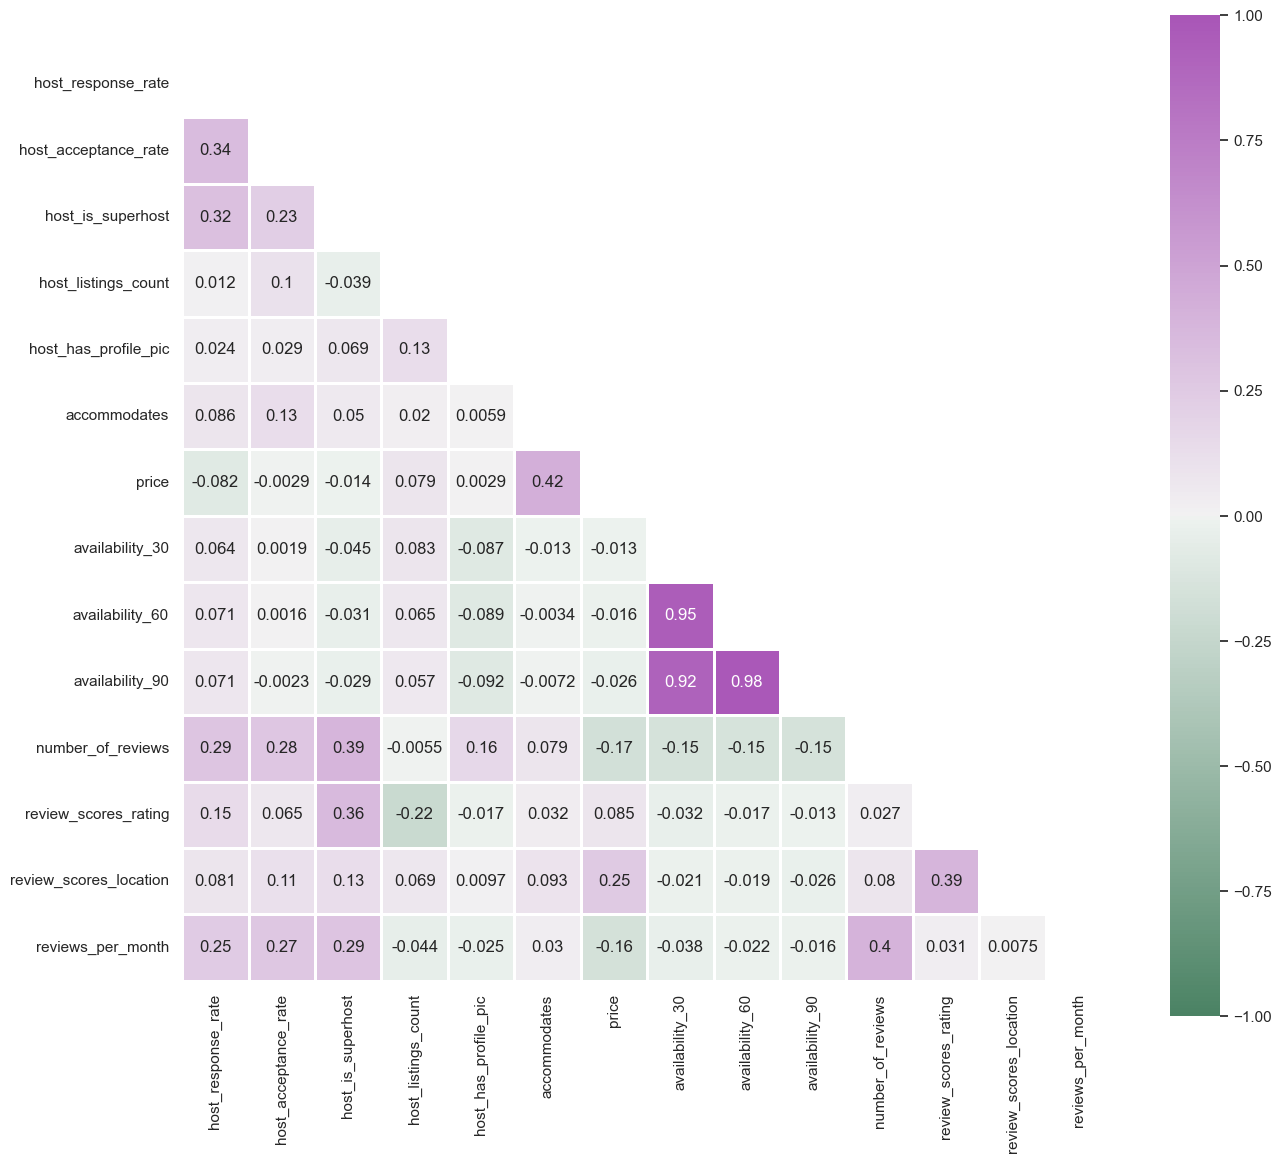

In [210]:
# Método de Spearman (Mide una dependencia no paramétrica y monotónica entre variables) 
corr = var.corr(method='spearman',numeric_only=True) # utilizo var, creada al principio del notebook

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) # con np.triu enmascara el triangulo superior, con np.tril el inferior
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask[0:30,0:30], cmap=cmap, vmax=1, center=0, vmin=-1,  
            square=True, linewidths=1, cbar_kws={"shrink": 1}, annot = True)      # cbar_kws={"shrink": 1} es el tamaño de la barra de color

Analizamos la simetría de alguna de las variables numéricas, por si necesitan alguna transformación:

In [83]:
# ANALIZAR SIMETRÍA MEDIANTE FISHER manualmente

from scipy import stats
from scipy.stats import skew
print(f"Valor del coeficiente de Fisher-Pearson sobre la distribución original: {skew(df['host_response_rate'])}") # skew: coeficiente de Fisher-Pearson para ver si siguen una distribución normal


Valor del coeficiente de Fisher-Pearson sobre la distribución original: -4.5570766717123075


La distribución de la variable sigue una asimetría negativa (la cola izquierda de la distribución es más larga). Normalizamos:

In [84]:
# Normalizamos manualmente
norm_fn = lambda col: (col-np.mean(col))/(np.sqrt(col))
norm_data = norm_fn(df['host_response_rate'])
# Calculamos el coeficiente de asimetría
skewness = skew(norm_data)
print(f"Valor del coeficiente de Fisher-Pearson sobre la distribución normalizada: {skewness}")


Valor del coeficiente de Fisher-Pearson sobre la distribución normalizada: nan


c:\Users\kina5\Desktop\Bootcamp\mi_entorno\lib\site-packages\scipy\stats\_stats_py.py:1048: RuntimeWarning:

invalid value encountered in subtract



### Test de hipótesis

Ratio respuesta/aceptación

In [89]:
#Primero comprobamos la normalidad de la distribución con Shapiro-Wilk

from scipy.stats import shapiro
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
stat, p = shapiro(df['host_response_rate'])
print('stat=%.3f, p=%.3f' % (stat, p)) # lo que me interesa realmente es el pvalor
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.354, p=0.000
No sigue una distribución Gaussiana


C:\Users\kina5\AppData\Local\Temp\ipykernel_20884\2364818817.py:5: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29357.



In [90]:
# Voy a probar otro test (K2 D'Agostino), ya que el warning me dice que el valor puede no ser preciso
from scipy.stats import normaltest
stat, p = normaltest(df['host_response_rate'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=26489.859, p=0.000
No sigue una distribución Gaussiana


Al no seguir una distribución normal, pasamos a hacer test no paramétricos para observar si las variables ``host_response_rate`` y ``host_acceptance_rate`` siguen la misma distribución:

In [91]:
# test U Mann-Whitney
from scipy.stats import mannwhitneyu

mean_response = df['host_response_rate'].mean()

grupo_A = df[df['host_response_rate'] >= mean_response]['host_acceptance_rate']
grupo_B = df[df['host_response_rate'] <  mean_response]['host_acceptance_rate']

stat, p = mannwhitneyu(grupo_A, grupo_B) 
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma distribución')
else:
	print('Probablemente tengan distinta distribución')

stat=66795601.000, p=0.000
Probablemente tengan distinta distribución


### Nube de palabras

*Referencia: https://github.com/lkuffo/data-viz/blob/main/NIVEL6/1_wordcloud.ipynb*

In [ ]:
#Partimos del df que contiene los comentarios de cada anuncio
df3 = df3.dropna() # Quitamos los nulos
df3.isnull().sum()

In [ ]:
df3 = df3.head(10000) #No consigo que cargue la nube con el dataset completo, así que voy a seleccionar las 10000 primeras filas

In [ ]:
texto = []
for comment in df3['comments']:
    texto.append(comment) # Mete todo los comentarios en una lista str

In [ ]:
def split_palabra(texto): # Función que separa cada palabra usando como delimitador el espacio
    palabra=str(texto).split() 
    return palabra
palabras = split_palabra(texto)

In [ ]:
# Creo la máscara para hacer la nube de palabras formando una imagen
mask = np.array(Image.open("home.jpg")) #Creo la máscara a partir de la imagen de una casa
mask[mask == 1] = 255 # los píxeles blancos (con un valor de 255) podrían definir las áreas en las que se mostrarán las palabras, mientras que los píxeles negros (con un valor de 0) podrían definir las áreas donde no se mostrarán palabras.

# Descargar stopwords: Para filtrar palabras irrelevantes (artículos, preposiciones)
nltk.download('stopwords')

# Obtener stopwords en español e inglés
stop_words_es = set(stopwords.words("spanish"))
stop_words_en = set(stopwords.words("english"))

# Unir las stopwords de ambos idiomas
stop_words = stop_words_es.union(stop_words_en)

# Crear la nube de palabras
palabras_final = ' '.join(palabras).lower().replace(',',' ').replace(':','')
palabras_final = re.sub(r'\b\w{1,2}\b', '', palabras_final)  # Eliminar palabras de 1 o 2 caracteres, porque me salían algunas r y br sueltas
nube = WordCloud(width=800, height=400, background_color='white',stopwords=stop_words,mask=mask).generate(palabras_final)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 8))
plt.imshow(nube, interpolation='bilinear') # interpola los valores de los píxeles en la imagen para crear una apariencia más suave y continua.
plt.axis('off')
plt.show()
nube.to_file("./nube_airbnb.png")